In [1]:
import numpy as np
import os.path
import sys
sys.path.append('../../libs/neuroneap') #('../../libs/')
sys.path.append('../../mylibs')

import matplotlib.pylab as plt
import matplotlib.colors as colors

import mylibs.plot_supp as pls

%matplotlib inline

# LFP
from eap import field, cell, graph
postfix = '_noAIS' #'_noAIS_noNode' # '_noAIS' ''

In [2]:
# params
ext = '.pdf'
plot_lim = [-2,2] #ms,  x_axis from the peak of the somatic spike
save_fig_dir = 'figs/'
save_movie_dir = 'figs/'

axon_color = 'teal'
soma_color = 'darkorange'

# define colormap 
mycmap = plt.cm.get_cmap('RdYlGn')


## load the data

In [3]:
data = np.load('data/data_hallerman'+postfix+'.npz')
data_zoom = np.load('data/lfp_zoom'+postfix+'.npz')

y_zoom = data_zoom['y_range']
x_zoom = data_zoom['x_range']

In [4]:
def plot_scalebar(ax, scalebar = 100, xp = 100, yp = -100):
# scalebar
    w, h = scalebar, scalebar
    plt.plot([xp, xp], [yp, yp+h], 'k-')
    plt.plot([xp, xp+h], [yp, yp], 'k-')
    plt.text(xp, yp+h/2., str(scalebar) +u" µm", ha='right', va='center',
             transform=ax.transData)
    plt.text(xp+h/2., yp, str(scalebar) + u" µm", ha='center', va='top',
             transform=ax.transData)

## find the spike and calculate params

In [5]:
# to do
# find the limits for xlims
v_soma = data['v_soma']
dt = data['dt']
spike_peak = np.argmax(v_soma)*dt

plot_lim = spike_peak+plot_lim
# define timeline
time = np.arange(len(v_soma))*dt

## draw the morphology of the cell

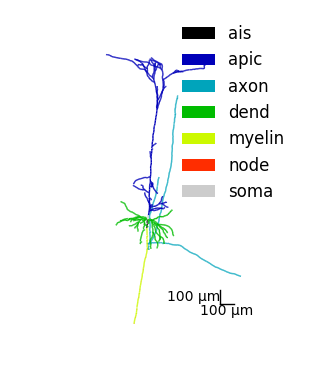

In [6]:
#from matplotlib import colors, ticker, patches
import matplotlib.patches as mpatches
fig_name = 'morpho'
color_cell = True

# get params
seg_coords = data['seg_coords']

ax = plt.subplot(1,2,1)
# draw rectangle into the zoom-in area

# choose color for the cell
if color_cell:
    
    all_segs=['ais', 'apic', 'axon', 'dend', 'my', 'node', 'soma']
    colors, colormap_seg = pls.get_colors_for_segs(seg_coords, all_segs)
    try:
        all_segs[all_segs.index('my')] = 'myelin' # change seg named 'my' to 'myelin'
    except:
        pass
    idx_colors = np.linspace(0,1, len(all_segs))
    cpatches = [mpatches.Patch(color=colormap_seg(idx_colors[idx]), linewidth=0,
                                      label=all_segs[idx]) for idx in range(len(all_segs))]
    plt.legend(handles=cpatches, frameon=False, loc=0)   
else:    
    colors = 'k'

# scalebar
plot_scalebar(ax, scalebar = 100, xp = 500, yp = -600)
    
#ax.add_patch(
#    patches.Rectangle((x_zoom[0], y_zoom[0]), x_zoom[1]-x_zoom[0], y_zoom[1]-y_zoom[0], edgecolor='b'
#    )
#)
col = graph.plot_neuron(seg_coords, colors=colors, autolim=True)

#pls.clean_plot(ax)
ax.axis('off')
plt.tight_layout()

plt.savefig('figs/morpho'+postfix+ext)

## zoom in to the AIS + soma

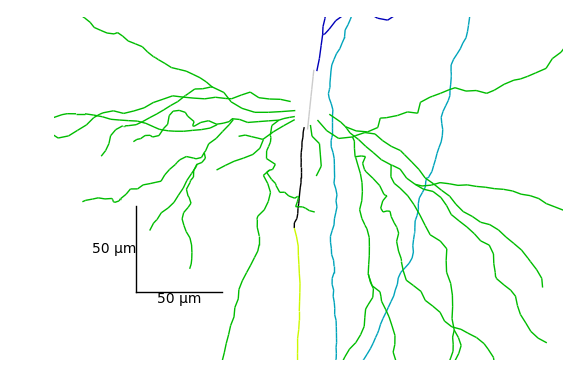

In [7]:
fig_name = 'morpho_zoom'
x_zoom = [-35,35]
y_zoom = [-150, 50]
ax2 = plt.subplot(1,1,1)
col = graph.plot_neuron(seg_coords, colors=colors, autolim=True)
#plt.axis('scaled')

plt.tight_layout()
#pls.clean_plot(ax2)
plot_scalebar(ax2, scalebar = 50, xp = -100, yp = -110)
plt.ylim(y_zoom)
plt.xlim(x_zoom)
ax2.axis('off')
plt.savefig('figs/morpho_zoom'+postfix+ext)

In [8]:
seg_coords = data['seg_coords']

In [9]:
import matplotlib.cm as cm
import matplotlib as mpl
#from matplotlib import colors, ticker, patches
from matplotlib import ticker
# color potassium densities in the cell


def plot_morpho_density(seg_dens, cmap, normalize=[0,2000], scalebar = 100, xp=500,yp=-600):
    fig = plt.figure(facecolor=(0.7, 0.7, 0.7))
    norm = mpl.colors.Normalize(vmin=normalize[0], vmax=normalize[1])
    
    ax = plt.subplot(1,2,1,  axisbg="none")
    col = graph.plot_neuron(seg_coords, scalar=seg_dens, norm=norm,autolim=True, cmap=cmap)

    # scalebar
    plot_scalebar(ax, scalebar, xp, yp)
    
    ax_cbar=plt.axes([0.55, 0.15, 0.02, 0.3], frameon=False)
    plt.colorbar(col, cax=ax_cbar, ticks=[0, 2000])
    ax_cbar.set_yticklabels([str(normalize[0]), '>'+str(normalize[1])])
    pls.clean_plot(ax)
    return fig, ax, ax_cbar
    #plt.tight_layout()

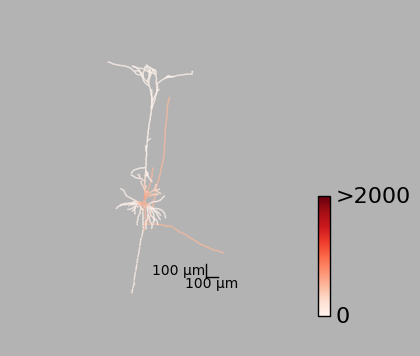

In [10]:
# plot Na density
Na = data['Na']
fig, ax, ax_cbar = plot_morpho_density(seg_dens = Na, normalize=[0,2000], cmap=cm.Reds)
#plt.title('Na: density:'+str(np.round([0,max(Na)],2)))
ax.axis('off')
#plt.draw()
plt.savefig('figs/Na_density'+postfix+ext, facecolor=fig.get_facecolor(), edgecolor='none')

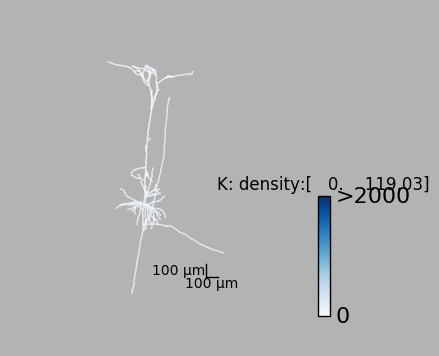

In [11]:
# plot K density
K = data['K']
fig, ax, ax_cbar = plot_morpho_density(seg_dens = K, normalize=[0,2000], cmap=cm.Blues)
plt.title('K: density:'+str(np.round([min(K),max(K)],2)))
ax.axis('off')
plt.savefig('figs/K_density'+postfix+ext, facecolor=fig.get_facecolor(), edgecolor='none')

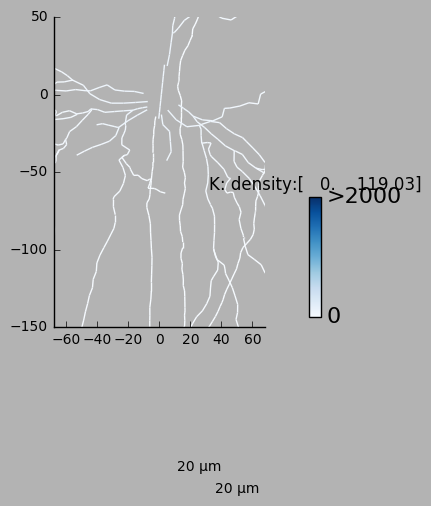

In [12]:
# plot K density zoomed
K = data['K']
fig, ax, ax_cbar = plot_morpho_density(seg_dens = K, normalize=[0,2000], cmap=cm.Blues, 
                                       scalebar=20,xp=40, yp=-250)
plt.title('K: density:'+str(np.round([min(K),max(K)],2)))

ax.set_xlim(x_zoom)
ax.set_ylim(y_zoom)
#ax.axis('off')
plt.savefig('figs/K_density_zoom'+postfix+ext, facecolor=fig.get_facecolor(), edgecolor='none')

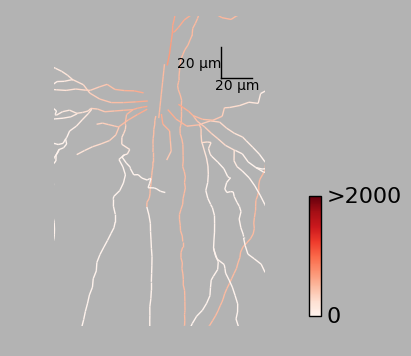

In [13]:
# plot K density
Na = data['Na']
fig, ax, ax_cbar = plot_morpho_density(seg_dens = Na, normalize=[0,2000], cmap=cm.Reds, 
                                       scalebar=20,xp=40, yp=10)
#plt.title('Na: density:'+str(np.round([min(Na),max(Na)],2)))

ax.set_xlim(x_zoom)
ax.set_ylim(y_zoom)
ax.axis('off')
plt.savefig('figs/Na_density_zoom'+postfix+ext, facecolor=fig.get_facecolor(), edgecolor='none')

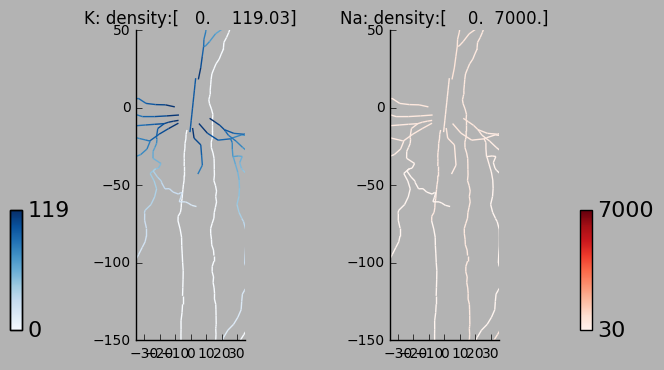

In [14]:
import matplotlib.cm as cm
import matplotlib as mpl
#from matplotlib import colors, ticker, patches
from matplotlib import ticker
# color potassium densities in the cell

fig = plt.figure(facecolor=(0.7, 0.7, 0.7))
fig_name = 'morpho'
color_cell = True

# get params
seg_coords = data['seg_coords']
K = data['K']
norm = mpl.colors.Normalize(vmin=-np.min(K), vmax=np.max(K))
cmap_K = cm.Blues
#x = 0.3
m = cm.ScalarMappable(norm=norm, cmap=cmap_K)
cols_K = [m.to_rgba(x) for x in K]

Na = data['Na']
#norm = mpl.colors.Normalize(vmin=-np.min(Na), vmax=np.max(Na))
cmap_Na = cm.Reds
#x = 0.3
#m = cm.ScalarMappable(norm=norm, cmap=cmap_Na)
#cols_Na = [m.to_rgba(x) for x in Na]

#cols = plt.colors.Colormap(K) 
#K = K/np.max(K)
ax = plt.subplot(1,2,1,  axisbg="none")
#col = graph.plot_neuron(seg_coords, colors=cols_K, autolim=True)
col = graph.plot_neuron(seg_coords, scalar=K, autolim=True, norm=norm, cmap=cmap_K)
plt.title('K: density:'+str(np.round([min(K),max(K)],2)))
plt.axis('scaled')
plt.ylim(y_zoom)
plt.xlim(x_zoom)

# colorbar
ax_cbar=plt.axes([0.0, 0.15, 0.02, 0.3], frameon=False)
plt.colorbar(col, cax=ax_cbar)
plt.colorbar(col, cax=ax_cbar, ticks=[0, max(K)])

pls.clean_plot(ax)
#plt.tight_layout()


ax = plt.subplot(1,2,2,  axisbg="none")
col = graph.plot_neuron(seg_coords, scalar=Na, autolim=True, cmap=cmap_Na)
plt.title('Na: density:'+str(np.round([0,max(Na)],2)))
plt.axis('scaled')
plt.ylim(y_zoom)
plt.xlim(x_zoom)

ax_cbar=plt.axes([0.95, 0.15, 0.02, 0.3], frameon=False)
plt.colorbar(col, cax=ax_cbar, ticks=[min(Na), max(Na)])

pls.clean_plot(ax)
#plt.tight_layout()

plt.savefig('figs/Na_K_density_zoom'+postfix+ext, facecolor=fig.get_facecolor(), edgecolor='none')